In [ ]:
import zapimoveis_scraper as zap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:
BAIRRO = ''
MES = ''

In [ ]:
def extract():
    items = []
    for item in zap.search(localization="rj+rio-de-janeiro+zona-oeste+" + BAIRRO + "/",num_pages=5,tipo="apartamentos",acao="aluguel"):
        items.append(item.__dict__)
    return items

In [ ]:
extract()

In [ ]:
items = extract()
pd.options.display.float_format = "{:,.2f}".format
df = pd.DataFrame(items)
df.head()

In [ ]:
def clean_data():
    price = df['price'].apply(lambda x: x.replace("R$", "")).astype(float)
    total_area_m2 = df['total_area_m2'].apply(lambda x: x.replace("m²", "")).astype(int)
    bedrooms = df['bedrooms'].astype(int)
    df_result = pd.concat([price, total_area_m2, bedrooms], axis=1, join="inner")
    df_dict = df_result.to_dict()
    for key, value in df_dict['price'].items():
        if value > 500:
            value /= 1000
            df_dict['price'][key] = value
            df_result = pd.DataFrame.from_dict(df_dict)
    
    return df_result

In [ ]:
clean_data()

In [ ]:
def mount_export():
    df_result = clean_data()
    df_result.loc[:,'mes'] = str('04')
    df_result.loc[:,'local'] = str(BAIRRO)
    df_result.to_csv(BAIRRO + ".csv")
    return

In [ ]:
mount_export()

In [ ]:
df_result = clean_data()
df_result.describe()

In [ ]:
path = r'./'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
frame.head(1000)

In [ ]:
frame.to_csv("dataset/abril.csv")

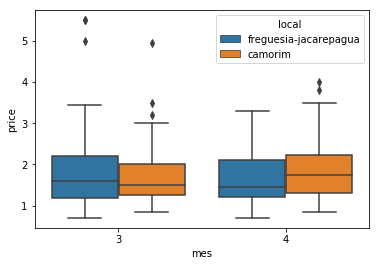

In [100]:
sns.boxplot(x="mes", y="price", data=frame, hue='local')

In [ ]:
## estudo a partir de dataset montado ##

In [101]:
def mount_lineplot():
    df_01 = pd.read_csv("dataset/marco.csv").drop("Unnamed: 0",axis=1).drop("Unnamed: 0.1",axis=1)
    df_02 = pd.read_csv("dataset/abril.csv").drop("Unnamed: 0",axis=1).drop("Unnamed: 0.1.1",axis=1).drop("Unnamed: 0.1",axis=1)
    data = df_01.merge(df_02, how='outer')
    data['mes'] = data['mes'].astype(str) ## transforme coluna floar em str
    sns.lineplot(data=data, x="mes", y="price", hue="local")
    return

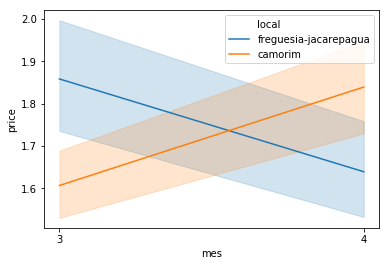

In [102]:
mount_lineplot()